# Demo
Compare the performance of several models 

In [1]:
# load packages 
%matplotlib inline 
%load_ext autoreload
%autoreload 2

In [2]:
# import file 
import numpy as np
from train_test import * 

## 0. Load data 

In [3]:
# reading in the data
X, Y = load_preprocess_data()

# sequential split 
X_train_complete, X_test_complete, Y_train, Y_test = \
            train_test_split(X, Y, shuffle=False)

# PCA
pca = PCA(n_components=20)
pca.fit(X_train_complete)
X_train = pca.transform(X_train_complete)
X_test = pca.transform(X_test_complete)

Loading Data ...
Finish Loading


In [4]:
# print the distribution of labels 
pd.Series(Y_train).value_counts(normalize=True)

0.0    0.452834
2.0    0.442703
1.0    0.104463
dtype: float64

## 1. Model Exploration

In [5]:
# dump file content
with open(os.path.join(report_path, 'accuracy.txt'), 'w') as f:
    f.write('')

/Users/andrewyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


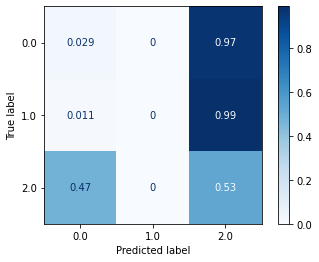

In [6]:
# logistic regression
train_test_lg(X_train, X_test, Y_train, Y_test)

/Users/andrewyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


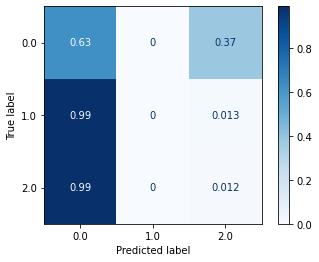

In [7]:
# SVC 
train_test_svc(X_train, X_test, Y_train, Y_test)

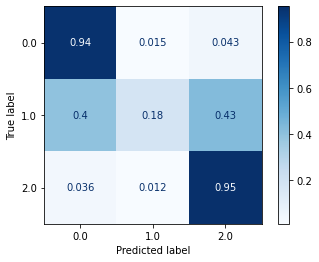

In [8]:
# gradient boosting 
train_test_boosting(X_train, X_test, Y_train, Y_test)

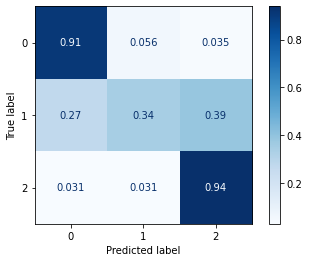

In [9]:
# XGBOOST 
train_test_xgb(X_train, X_test, Y_train.astype(int), Y_test.astype(int))

## 2. Trading 

In [14]:
from naive_trading import * 